# BASIC PYTHON COMMANDS

### Yes...why not a Hello World...

In [1]:
print("Hello World")

Hello World


In [2]:
a=5 #This is how you introduce a oneliner comment !!!
b=2

### Basic arithmetic operations are available

In [3]:
a**b

25

In [4]:
a//b

2

In [5]:
a/float(b)

2.5

In [6]:
a%b

1

In [7]:
min(a,b)

2

In [8]:
a += 3 #same as a=a+3 basically, we can use also -, * and / operators
a

8

In [9]:
c=a
c=c+10
a #will "a" change because i changed "c" which was set to be "the same" as "a" ?

8

### Logical operators also exist...

In [10]:
a != b

True

### User defined lists and methods to handle them 

In [11]:
a = [1, "hello", 5.5] #This is a list...

In [12]:
a

[1, 'hello', 5.5]

In [13]:
len(a)

3

In [14]:
a[0] # get me the first element index is 0 

1

In [15]:
a.append("how are you?")  #see that a list is "mutable...you can change it"
a

[1, 'hello', 5.5, 'how are you?']

In [16]:
a.pop(1)

'hello'

In [17]:
a

[1, 5.5, 'how are you?']

In [18]:
for x in a:
    print(x)
    print(a)

1
[1, 5.5, 'how are you?']
5.5
[1, 5.5, 'how are you?']
how are you?
[1, 5.5, 'how are you?']


### A word of caution when using lists...

In [19]:
print("list a=",a)
b=a
b[1]=666
print("list a=",a) #Oh my...

list a= [1, 5.5, 'how are you?']
list a= [1, 666, 'how are you?']


In [20]:
#There is a handy module to avoid such messy outcome...
import copy
a=[1, 5.5, 'how are you?']
print("list a=",a)
b=copy.deepcopy(a)
b[1]=666
print("list a=",a) #sweet...
print("list b=",b)

list a= [1, 5.5, 'how are you?']
list a= [1, 5.5, 'how are you?']
list b= [1, 666, 'how are you?']


### Enumerators in loops are pretty handy

In [21]:
for i,x in enumerate(a):
    print("element {}: {}".format(i, x))  #this is one way to print formatted output

element 0: 1
element 1: 5.5
element 2: how are you?


In [22]:
a[0] = 10  #No problem in changing this entry of the list...
a

[10, 5.5, 'how are you?']

### Now let's use an "imutable" list : tuples

In [23]:
b = (-1, "ola", 2.5) # Python Tuple 

In [24]:
b[0] #no problem accessing it...

-1

In [25]:
b[1] = "Goodbye" #can i change it ?!

TypeError: 'tuple' object does not support item assignment

In [26]:
x,y,z = b #x,y,z get a copy of the several tuple content...nice...
z

2.5

In [27]:
z=16 #if i change the z (3rd item in the tuple)....
b

(-1, 'ola', 2.5)

### Python dictionaries are handy for structured data

In [28]:
a = {"name":"Mary", "age":23, "sign":"Leo"} # Python Dictionary

In [29]:
a["name"]

'Mary'

In [30]:
a["job"] = "student"
a


{'name': 'Mary', 'age': 23, 'sign': 'Leo', 'job': 'student'}

In [31]:
Class=[]
Class.append(a)
Class.append({"name":"John", "age":21, "sign":"Taurus"}) #lists don't care the content is not "structured" equal
Class

[{'name': 'Mary', 'age': 23, 'sign': 'Leo', 'job': 'student'},
 {'name': 'John', 'age': 21, 'sign': 'Taurus'}]

### Defining/using Python functions

In [32]:
def func2(a, b=4, c=5):
    if ( a > 2 and b < 10):
        return a
    elif c == 5:
        return b
    else:
        return a + b +c

In [33]:
func2(4,c=6, b = 11)

21

# 

# The NUMPY module - basic commands

In [34]:
# Numpy Module
import numpy as np

In [35]:
a = np.array([0, 2, 4, 6, 8, 10, 12,14,16])
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [36]:
a.shape

(9,)

In [37]:
a[::-1]

array([16, 14, 12, 10,  8,  6,  4,  2,  0])

In [38]:
a=np.array([[0, 1, 2, 3], [4,5,6,7],[8, 9, 10, 11]])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
a.shape

(3, 4)

In [40]:
a[:,0:2]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [41]:
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [42]:
np.mean(a)

5.5

In [43]:
a.mean(axis=0)

array([4., 5., 6., 7.])

# The MATPLOTLIB module - basic plotting commands

In [44]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [46]:
x=np.linspace(-5,5, 50)
y = np.sin(x)
y2 = y ** 2
y3  = -x / 5.0

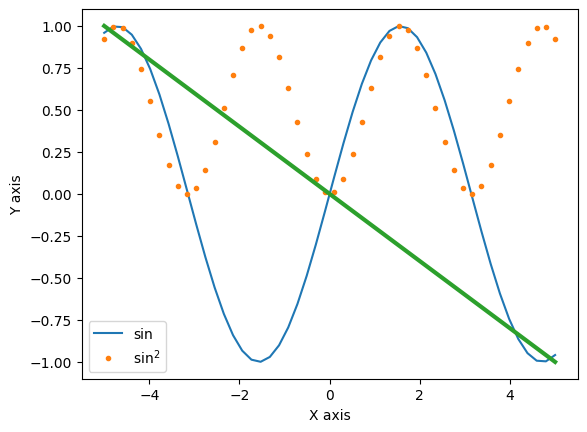

In [47]:
plt.figure()
plt.plot(x,y,label='sin')
plt.plot(x,y2, '.', label='$\sin^{2}$')
plt.plot(x,y3,linewidth=3)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

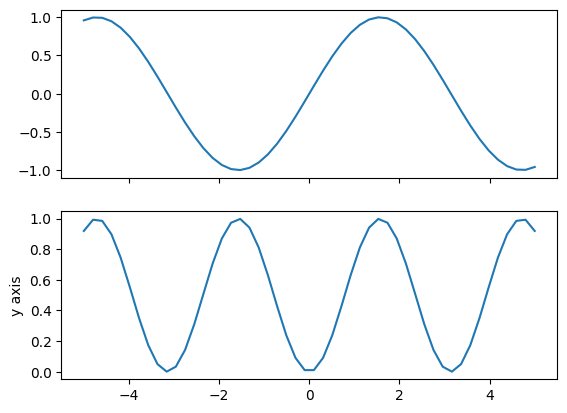

In [48]:
fig, ax = plt.subplots(2, sharex = True)
ax[0].plot(x,y)
ax[1].plot(x,y2)
ax[1].set_ylabel('y axis')
plt.show()

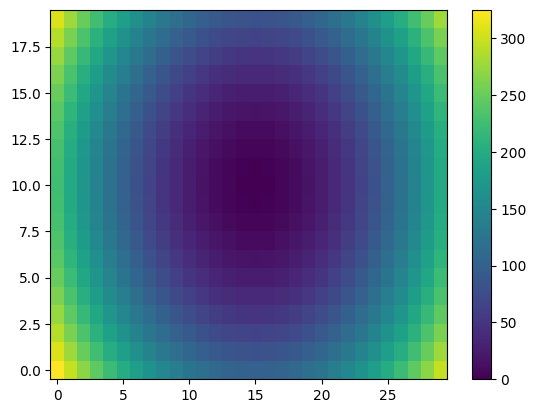

In [49]:
y,x = np.mgrid[0:20, 0:30]
z = (x-15)**2 + (y-10) **2
plt.figure()
plt.pcolormesh(x,y,z)
plt.colorbar()
plt.show()

# The SCIPY module - basic scientific methods

In [50]:
# SciPy
from scipy.optimize import curve_fit
def f(x,a,b,c):
    return a * np.exp(-b * x ) +c
n=60
x = np.linspace(0,5, n)
yclean = f(x, 5, 2, 0.5)
y = yclean + 0.5 * np.random.randn(n)


### Basic interpolation

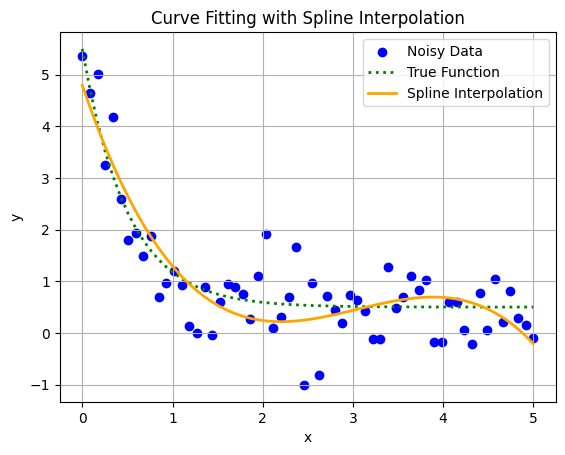

In [101]:
from scipy.interpolate import UnivariateSpline
# Create the spline interpolant using the noisy data
spline_interp = UnivariateSpline(x, y)
# Plot the data and the fitted function
plt.scatter(x, y, label='Noisy Data', color='blue')
plt.plot(x, yclean, label='True Function', color='green', linestyle='dotted', linewidth=2)
plt.plot(x, spline_interp(x), label='Spline Interpolation', color='orange', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting with Spline Interpolation')
plt.grid(True)
plt.show()

### Curve fitting

In [57]:
popt, pcov = curve_fit (f, x, y) #provide the "model" function and X and Y data series
perr = np.sqrt(np.diag(pcov))
y_fit = f(x, *popt)
msd = np.sum((y-y_fit) ** 2)/n

In [58]:
print(['{} +/- {}'.format(popt[i],perr[i]) for i in range(3)])
print(msd)

['5.3853195796791296 +/- 0.4084694684080919', '2.130180336095231 +/- 0.2830201999462213', '0.41545101320860345 +/- 0.09243115657898']
0.018404856550630094


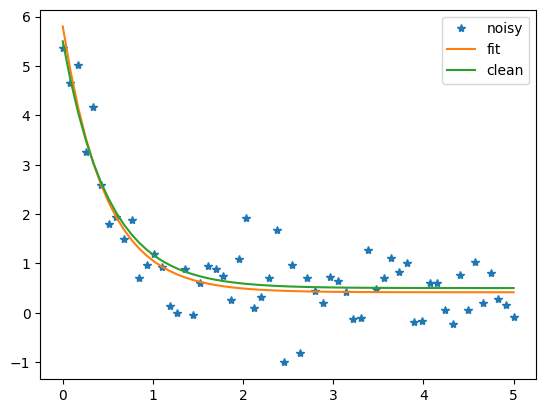

In [59]:
plt.plot(x,y,'*',label='noisy')
plt.plot(x,y_fit,label='fit')
plt.plot(x,yclean,label='clean')
plt.legend(loc='best')
plt.show()

### Piecewise curve fitting

Coefficients for Function 1: a = 1.8403558035460634 b = 1.1679012655048173
Coefficients for Function 2: c = -3.044630569481815 d = 30.353998307563657
Transition point: x = 3.486773594532675
Reduced Chi-Squared: 0.020671379774281975


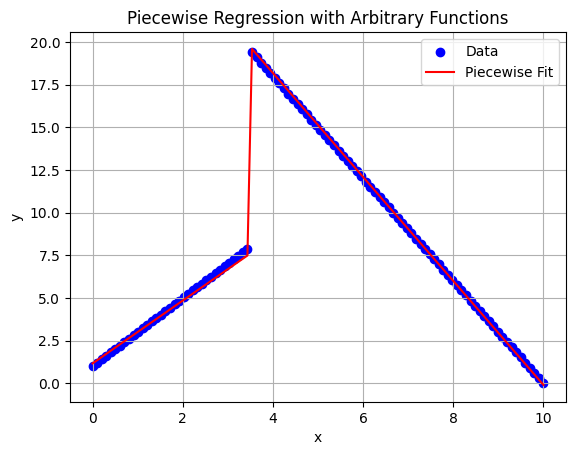

In [131]:
# Define the two functions with two coefficients each
def func1(x, a, b):
    return a * x + b

def func2(x, c, d):
    return c * x + d

# Define the piecewise model with two functions and a single transition point
def piecewise_function(x, a, b, c, d, transition):
    y=func1(x,a,b)
    y[x > transition]=func2(x[x > transition],c,d)
    #print(transition)
    return y
    #return np.piecewise(x, [x <= transition, x > transition], [lambda x: func1(x, a, b), lambda x: func2(x, c, d)])

# Define the piecewise model with two functions and a single transition point
def piecewise_C2_function(x, a, b, c, d, transition):
    y=func1(x,a,b)*(1-sigmoid(x-transition,k=12)) + func2(x,c,d)*sigmoid(x-transition,k=12)
    return y

def sigmoid(x, k=1):
    return 1/(1+np.exp(-k*x))

#######################################################    
# Generate example data with a single transition point
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + 1  # Function1 on the first segment
transition_point = 3.5
y_data[x_data > transition_point] = -3 * x_data[x_data > transition_point] + 30  # Function2 on the second segment
#y_data[x_data > transition_point] = ( -3 * x_data[x_data > transition_point] + 
#                                     18.3 )

# Perform the curve fit
initial_guess = [1.0, 1.0, 1.0, 1.0, 4.5]  # Initial guess for the coefficients and transition point

# Define the bounds for the coefficients and transition point during the fit
lower_bounds = [-np.inf, -np.inf, -np.inf, -np.inf, 0.0]
upper_bounds = [np.inf, np.inf, np.inf, np.inf, 10.0]
popt, cov = curve_fit(piecewise_C2_function, x_data, y_data, p0=initial_guess, 
                    bounds=(lower_bounds, upper_bounds))

# Extract the coefficients and transition point
a, b, c, d, transition_point = popt

# Print the results
print("Coefficients for Function 1: a =", a, "b =", b)
print("Coefficients for Function 2: c =", c, "d =", d)
print("Transition point: x =", transition_point)

# Fit metrics
y_fit = piecewise_function(x_data, *popt)
residuals = y_data - y_fit
degrees_of_freedom = len(x_data) - len(popt)
chi_squared = np.sum(residuals**2)
reduced_chi_squared = chi_squared / degrees_of_freedom
print("Reduced Chi-Squared:", reduced_chi_squared)

# Plot the data and the fitted piecewise function
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, piecewise_function(x_data, a, b, c, d, transition_point), label='Piecewise Fit', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Regression with Arbitrary Functions')
plt.grid(True)
plt.show()


### Cross correlation between signals

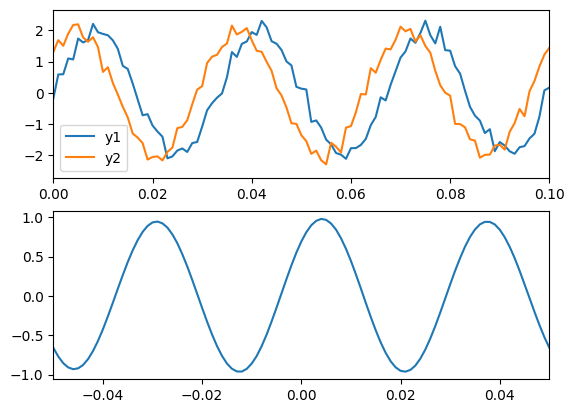

In [54]:
import math
from scipy import signal
pi=math.pi

n=1000
sfreq=1e3 #sampling frequency
dt=1/sfreq  #sampling time
t=np.arange(0,n)*dt
f1=30.0  #in Hz
y1 = 2.0*np.sin(2.0*pi*f1*t) + 0.2*np.random.randn(n)
y2 = 2.0*np.sin(2.0*pi*f1*t+pi/4.0) + 0.2*np.random.randn(n)
corr = signal.correlate(y1, y2,mode='same')/np.linalg.norm(y1)/np.linalg.norm(y2)
lags = signal.correlation_lags(len(y1), len(y2),mode='same')*dt
fig, ax = plt.subplots(2)
ax[0].plot(t,y1,label='y1')
ax[0].plot(t,y2,label='y2')
ax[0].set_xlim([0,0.1])
ax[0].legend(loc='best')
ax[1].plot(lags,corr,label='corr')
ax[1].set_xlim([-0.05,0.05])
plt.show()

In [55]:
print(np.argmax(corr))
print(corr[np.argmax(corr)])
print(lags[np.argmax(corr)])

504
0.980112759808687
0.004
